In [35]:
# 로컬 환경설정기준으로 작성하였으니 폰트같은 부분은 수정해서 사용하시기 바랍니다.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/정직_1.ttf'
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objs as go 
import plotly.express as px

In [36]:
# ========================================================= 데이터 시각화 파트 =========================================================
df1 = pd.read_excel("C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/01_parcelServiceLogistics.xlsx")

In [37]:
df_total = df1.iloc[8:13,6:]
df_total.columns = ['연도', '전체 택배 물동량', '전년대비 증감율', '2012년대비 증감율']
df_total['전체 택배 물동량'] = df_total['전체 택배 물동량']*10   # 통계 기준이 10000박스인데 우체국은 1000통 단위라 10을 곱함
df_total['연도']=df_total.연도.apply(lambda x: x.replace('년', ''))
df_total

,연도,전체 택배 물동량,전년대비 증감율,2012년대비 증감율
8,2016,2046660,0.127,0.455682
9,2017,2319460,0.1333,0.649711
10,2018,2542780,0.096,0.808546
11,2019,2789800,0.0972,0.984239
12,2020,3373730,0.2093,1.399558


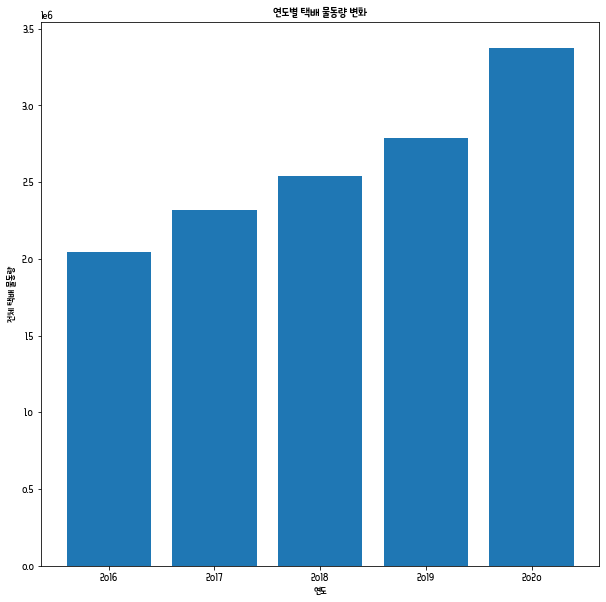

In [38]:
#연도별 택배 물동량 변화
plt.figure(figsize=(10,10))
plt.title('연도별 택배 물동량 변화')
plt.bar(df_total['연도'], df_total['전체 택배 물동량'])
plt.xlabel('연도')
plt.ylabel('전체 택배 물동량')
plt.show()

In [39]:
year = df_total['연도'].to_numpy()
year

array(['2016', '2017', '2018', '2019', '2020'], dtype=object)

In [40]:
df2 = pd.read_csv("C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/연도별_물량_현황_국내__20211020141748.csv", encoding="euc-kr")
df2

,우편물종별(1),우편물종별(2),2016,2017,2018,2019,2020
0,합계,소계,3874115,3706334,3589622,3398070,3114667
1,일반통상,소계,3378330,3185638,3040933,2801269,2530727
2,특수통상,소계,277339,276986,276156,272449,265150
3,소포,소계,218446,243710,272534,324351,318791
4,소포,보통,1632,1337,1230,1083,1166
5,소포,등기,216814,242373,271304,323268,317625
6,재게 (인터넷우체국),소계,5828,6120,8029,13712,15549


In [41]:
df_post = df2.iloc[3,2:]
df_post = df_post.to_frame().reset_index()
df_post = df_post.rename(columns= {'index':'연도', 3:'우체국 택배 물동량'})
df_post

,연도,우체국 택배 물동량
0,2016,218446
1,2017,243710
2,2018,272534
3,2019,324351
4,2020,318791


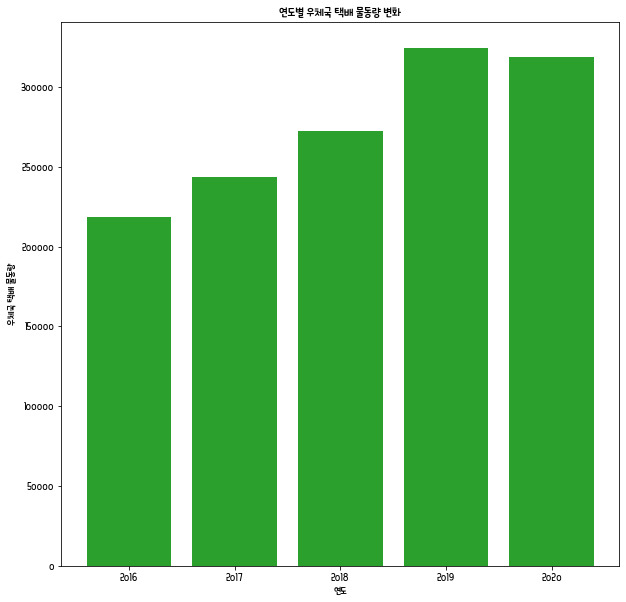

In [42]:
#연도별 우체국 택배 물동량 변화
plt.figure(figsize=(10,10))
plt.title('연도별 우체국 택배 물동량 변화')
plt.bar(df_post['연도'], df_post['우체국 택배 물동량'], color="C2")
plt.xlabel('연도')
plt.ylabel('우체국 택배 물동량')
plt.show()

In [43]:
df_post.columns = ['연도', '우체국 택배 물동량']
df_total2 = df_total[['연도', '전체 택배 물동량']]
df = pd.merge(df_total2, df_post, left_on='연도', right_on='연도', how='outer')
df

,연도,전체 택배 물동량,우체국 택배 물동량
0,2016,2046660,218446
1,2017,2319460,243710
2,2018,2542780,272534
3,2019,2789800,324351
4,2020,3373730,318791


<Figure size 720x720 with 0 Axes>

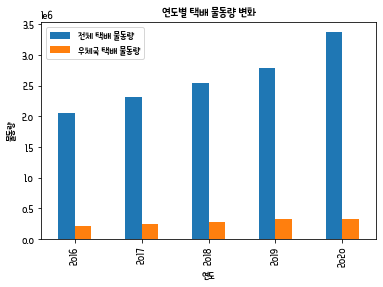

In [44]:
#연도별 택배 물동량 변화
plt.figure(figsize=(10,10))
df.plot(x="연도", y=["전체 택배 물동량", "우체국 택배 물동량"], kind="bar")
plt.title('연도별 택배 물동량 변화')
plt.xlabel('연도')
plt.ylabel('물동량')
plt.show()

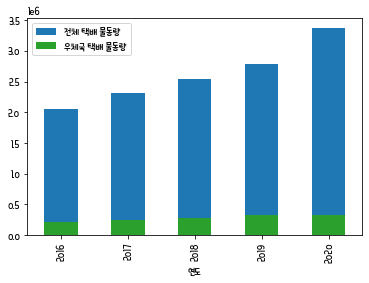

In [45]:
ax = df.plot(x="연도", y="전체 택배 물동량", kind="bar")
df.plot(x="연도", y="우체국 택배 물동량", kind="bar", ax=ax, color="C2")
#df.plot(x="연도", y="우체국 택배 물동량", kind="bar", ax=ax, color="C3")

plt.show()

No handles with labels found to put in legend.


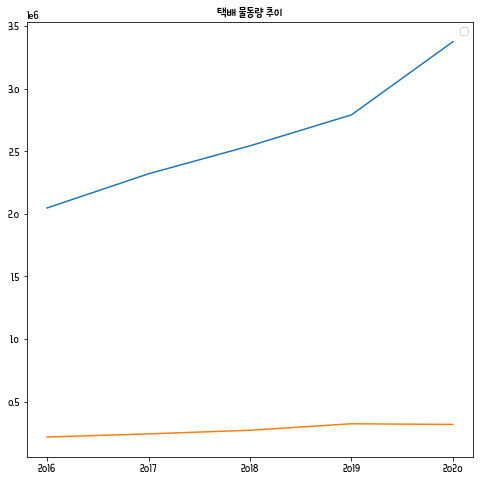

In [46]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()

ax.plot(year, df_total['전체 택배 물동량'])
ax.plot(year, df_post['우체국 택배 물동량'])

ax.legend()

plt.title('택배 물동량 추이')
plt.show()

In [47]:
# ============================================ 네이버 OCR API활용 송장인식 및 시각화 파트 =============================================
# AI 서비스 실행절차(필요함수 선언)

# 사진파일 리스트 읽어오기
def select_file(path_dir):
    import os
    file_dir = os.listdir(path_dir)
    print('해당되는 파일을 골라주세요.')
    for i in range(len(file_dir)):
        print(f'{i}번 : {file_dir[i]}')
    file_num = int(input())
    return file_dir[file_num]

# # 해당되는 템플릿 선택하기
# def select_template(template_path):s
#     import pandas as pd
#     import numpy as np
#     template = pd.read_csv(template_path, sep = ' ')
#     print('해당되는 템플릿을 골라주세요.')
#     for i in range(len(template['name'])):
#         print(f'{i}번 : {template["name"][i]}')
#     template_num = int(input())
#     return template['id'][template_num]

# NaverAPI서버에 요청
def request_NaverOCR(key_path, file_name):
    import requests
    import uuid
    import time
    import json

    api_url = key_path[key_path['title'] == 'InvokeUrl']['content'][0]
    secret_key = key_path[key_path['title'] == 'SecretKey']['content'][1]

    image_file = f'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/input/{file_name}'
    output_file = f'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/output/{file_name.split(".")[0]+".json"}'

    request_json = {
        'images': [
            {
                'format': 'jpg',
                'name': 'demo',
                # 'templateIds': [int(template_id)]
            }
        ],
        'requestId': str(uuid.uuid4()),
        'version': 'V2',
        'timestamp': int(round(time.time() * 1000))
    }

    payload = {'message': json.dumps(request_json).encode('UTF-8')}
    files = [
    ('file', open(image_file,'rb'))
    ]
    headers = {
    'X-OCR-SECRET': secret_key
    }

    response = requests.request("POST", api_url, headers=headers, data = payload, files = files)

    res = json.loads(response.text.encode('utf8'))
    # print(res)

    with open(output_file, 'w', encoding='utf-8') as outfile:
        json.dump(res, outfile, indent=4, ensure_ascii=False)
    return output_file

def extract_info(output_file):
    import json
    import pandas as pd
    import numpy as np
    with open(output_file, 'r', encoding = 'utf-8') as f:
        json_data = json.load(f)

    ctg_list = []
    contents_list = []

    for i in range(len(json_data['images'][0]['fields'])):
        ctg_list.append(json_data['images'][0]['fields'][i]['name'])
        contents_list.append(json_data['images'][0]['fields'][i]['inferText'])
    df_info = pd.DataFrame([contents_list], columns = ctg_list)
    df_info['보내는분 주소'] = df_info['보내는분 주소'].apply(lambda x: x.split('\n')[0])
    df_info['받는분 주소'] = df_info['받는분 주소'].apply(lambda x: x.split('\n')[0])
    return pd.DataFrame(df_info)

# 도로명 주소 받아오기
def juso_addr(df_info, juso_api_key):
    import pandas as pd
    import numpy as np
    import requests
    from urllib.parse import quote
    road_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'
    addr_list = []
    with open(juso_api_key) as f:
        api_key = f.read()
    df_info['도로명주소(보내는분)'] = [0 for _ in range(len(df_info['보내는분 주소']))]
    df_info['도로명주소(받는분)'] = [0 for _ in range(len(df_info['받는분 주소']))]
    for i in range(len(df_info['보내는분 주소'])):
        try:
            option = f'confmKey={api_key}&currentPage=1&countPerPage=10&keyword={quote(df_info["보내는분 주소"][i])}' # f스트링에서 &을 통해 연결
            url = f'{road_url}?{option}&resultType=json'
            result = requests.get(url).json()
            addr = result['results']['juso'][0]['roadAddr']    
            df_info['도로명주소(보내는분)'][i] = addr
        except:
            print(i)
    for i in range(len(df_info['받는분 주소'])):
        try:
            option = f'confmKey={api_key}&currentPage=1&countPerPage=10&keyword={quote(df_info["받는분 주소"][i])}' # f스트링에서 &을 통해 연결
            url = f'{road_url}?{option}&resultType=json'
            result = requests.get(url).json()
            addr = result['results']['juso'][0]['roadAddr']    
            df_info['도로명주소(받는분)'][i] = addr
        except:
            print(i)
    df_info1 = df_info.copy()
    return df_info1

# 카카오 API활용 위도,경도 받아오기
def location_point(df_info1, kakao_api_key):
    import pandas as pd
    import numpy as np
    import requests
    from urllib.parse import quote
    search_url = 'https://dapi.kakao.com/v2/local/search/address.json'
    df_info = df_info1.copy()
    with open(kakao_api_key) as f:
        api_key2 = f.read()
    lat_list, lng_list = [], []
    for i in range(len(df_info['도로명주소(보내는분)'])):
        try:
            url = f'{search_url}?query={quote(df_info["도로명주소(보내는분)"][i])}'
            result = requests.get(url,
                            headers = {'Authorization': f'KakaoAK {api_key2}'}).json()
            lng = float(result['documents'][0]['x']) # 경도
            lng_list.append(lng)
            lat = float(result['documents'][0]['y']) # 위도
            lat_list.append(lat)
        except:
            lng, lat = 0, 0
            lng_list.append(lng)
            lat_list.append(lat)
    df_info['위도(보내는분)'] = lat_list
    df_info['경도(보내는분)'] = lng_list

    lat_list, lng_list = [], []
    for i in range(len(df_info['도로명주소(받는분)'])):
        try:
            url = f'{search_url}?query={quote(df_info["도로명주소(받는분)"][i])}'
            result = requests.get(url,
                            headers = {'Authorization': f'KakaoAK {api_key2}'}).json()
            lng = float(result['documents'][0]['x']) # 경도
            lng_list.append(lng)
            lat = float(result['documents'][0]['y']) # 위도
            lat_list.append(lat)
        except:
            lng, lat = 0, 0
            lng_list.append(lng)
            lat_list.append(lat)
    df_info['위도(받는분)'] = lat_list
    df_info['경도(받는분)'] = lng_list
    df_info2 = df_info.copy()
    return df_info2

# 지도에 위치표시(보내는분, 받는분)
def point_map(df_info2, zoom_size):
    import folium
    df_info = df_info2.copy()
    location = [(df_info['위도(보내는분)'].mean() + df_info['위도(받는분)'].mean()) / 2, (df_info['경도(보내는분)'].mean() + df_info['경도(받는분)'].mean()) / 2]
    map = folium.Map(location = location, zoom_start = zoom_size)
    map
    for i in range(len(df_info['도로명주소(보내는분)'])):
        folium.Marker(
            location = [df_info['위도(보내는분)'][i], df_info['경도(보내는분)'][i]], # 위도, 경도
            popup =  folium.Popup(f'보내는사람 : {df_info["보내는분 성명"][i]}', max_width = 200),
            tooltip = f'주소 : {df_info["도로명주소(보내는분)"][i]}',
            icon = folium.Icon(color = 'blue', info = 'info-sign'),
        ).add_to(map)
    for i in range(len(df_info['도로명주소(받는분)'])):
        folium.Marker(
            location = [df_info['위도(받는분)'][i], df_info['경도(받는분)'][i]], # 위도, 경도
            popup =  folium.Popup(f'받는사람 : {df_info["받는분 성명"][i]}', max_width = 200),
            tooltip = f'주소 : {df_info["도로명주소(받는분)"][i]}',
            icon = folium.Icon(color = 'red', info = 'info-sign'),
        ).add_to(map)
    return map

In [48]:
# # 필요패키지 로드
# import pandas as pd
# import numpy as np

# # 파일선택 후 API를 요청하여 추출정보 받아오기
# path_dir = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/input'
# template_path = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/Template(Naver_OCR).txt'
# key_path = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/Key_URL(Naver_OCR).txt', sep = '_')
# file_name = select_file(path_dir)
# juso_api_key = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/roadapikey.txt'
# kakao_api_key = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/kakaoapikey.txt'

# # template_id = select_template(template_path)
# output_file = request_NaverOCR(key_path, file_name)
# df_info = extract_info(output_file)
# df_info1 = juso_addr(df_info, juso_api_key)
# df_info2 = location_point(df_info1, kakao_api_key)
# map = point_map(df_info2, 11)
# map

In [49]:
# 네이버 API 이용
idpw_link = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/api_key.xlsx'
idpw = pd.read_excel(idpw_link, sheet_name='PJTJ4U')

In [50]:
import urllib.request
import json

client_id, client_secret = idpw.iloc[3,3], idpw.iloc[7,3]

def search_map(search_text):
    encText = urllib.parse.quote(search_text) 
    url = 'https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query='+encText

    request = urllib.request.Request(url)
    request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
    request.add_header('X-NCP-APIGW-API-KEY', client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if(rescode==200):
        response_body = response.read().decode('utf-8')
        response_body = json.loads(response_body)
        return response_body
    else:
        print("Error Code:" + rescode)

In [51]:
user = search_map("서울 중구 세종대로 110")
user

{'status': 'OK',
 'meta': {'totalCount': 1, 'page': 1, 'count': 1},
 'addresses': [{'roadAddress': '서울특별시 중구 세종대로 110 서울특별시청',
   'jibunAddress': '서울특별시 중구 태평로1가 31 서울특별시청',
   'englishAddress': '110, Sejong-daero, Jung-gu, Seoul, Republic of Korea',
   'addressElements': [{'types': ['SIDO'],
     'longName': '서울특별시',
     'shortName': '서울특별시',
     'code': ''},
    {'types': ['SIGUGUN'], 'longName': '중구', 'shortName': '중구', 'code': ''},
    {'types': ['DONGMYUN'],
     'longName': '태평로1가',
     'shortName': '태평로1가',
     'code': ''},
    {'types': ['RI'], 'longName': '', 'shortName': '', 'code': ''},
    {'types': ['ROAD_NAME'],
     'longName': '세종대로',
     'shortName': '세종대로',
     'code': ''},
    {'types': ['BUILDING_NUMBER'],
     'longName': '110',
     'shortName': '110',
     'code': ''},
    {'types': ['BUILDING_NAME'],
     'longName': '서울특별시청',
     'shortName': '서울특별시청',
     'code': ''},
    {'types': ['LAND_NUMBER'],
     'longName': '31',
     'shortName': '31',
     'c

In [52]:
# ================================================= 주소오타 수정목적 유사도 비교파트 =================================================
# 해당부분은 필요 패키지가 매우 많고, 복잡합니다. 관심있으신 분들은 따로 연락주시면 자료 및 사용패키지관련해서 알려드리겠습니다.
import torch
import numpy as np
import pandas as pd
embedding_jibun = np.load('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/embedding_result(지번).npy')
embedding_jibun.shape
df = pd.read_csv('C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/주소변환완료.csv')
sentences = [juso for juso in df['지번주소']]
len(sentences), len(set(sentences)) # 중복값 확인

(521434, 521434)

In [53]:
# Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks
# 출처 : https://github.com/UKPLab/sentence-transformers
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-mpnet-base-v2')

In [54]:
input = '서웅시 강남구 영삼동 718-5'
# input_embeddings = model.encode(input, convert_to_tensor = True)
input_embeddings = model.encode(input)
# input_embeddings = input_embeddings.cpu().numpy()
from sklearn.metrics.pairwise import cosine_similarity
input_embeddings = np.expand_dims(input_embeddings, axis = 0) 
cosine_scores = cosine_similarity(embedding_jibun, input_embeddings)
cosine_scores_list= cosine_scores.tolist()
print(f"'{input}'과 가장 유사한 주소(유사도 : {max(cosine_scores_list)} : '{sentences[cosine_scores_list.index(max(cosine_scores_list))]}'")

'서웅시 강남구 영삼동 718-5'과 가장 유사한 주소(유사도 : [0.9771481156349182] : '서울특별시 강남구 역삼동 718-5'


In [55]:
# ===================================================== 네이버 보이스 AI 사용파트 =====================================================
import urllib.request
from datetime import datetime

idpw_link = 'C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/api_key.xlsx'
idpw = pd.read_excel(idpw_link, sheet_name='PJTJ4U')
client_id, client_secret = idpw.iloc[3,3], idpw.iloc[7,3]

def naver_tts(voice_text,speaker='nara_call'):
    encText = urllib.parse.quote(voice_text)
    data = f'speaker={speaker}&volume=0&speed=0&pitch=0&format=mp3&text={encText}'
    url = 'https://naveropenapi.apigw.ntruss.com/tts-premium/v1/tts'

    request = urllib.request.Request(url)
    request.add_header('X-NCP-APIGW-API-KEY-ID', client_id)
    request.add_header('X-NCP-APIGW-API-KEY', client_secret)

    response = urllib.request.urlopen(request, data=data.encode('utf-8'))
    rescode = response.getcode()

    if(rescode==200):
        response_body = response.read()
        now = datetime.now()
        # 파일을 저장할 위치 지정
        with open(f"C:/Workspace/python/빅데이터 지능형서비스 개발 팀프로젝트/PJTJ4U/공용소스코드/Data/{now.year}.{now.month:02d}.{now.day:02d}_{(now.hour+9)%24:02d}.{now.minute:02d}.{now.second:02d}_{speaker}.mp3", 'wb') as f:
            f.write(response_body)
        print(f'TTS_{speaker}.mp3 저장')
    else:
        print("Error Code:" + rescode)

In [56]:
# text = '저희 홈페이지를 방문해주셔서 감사합니다. 서비스와 관련된 사항이 궁금하시면 아래 이메일로 연락주시기 바랍니다.'
# naver_tts(text)

TTS_nara_call.mp3 저장
